<a href="https://www.kaggle.com/code/markusdarkus/first-eda-and-easy-models?scriptVersionId=137811006" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))

import re
from nltk.tokenize import word_tokenize
import gensim
import string

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))

import re
from nltk.tokenize import word_tokenize
import gensim
import string

from tqdm import tqdm
from keras.preprocessing.text import Tokenizer

from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

import torch

import warnings
warnings.simplefilter('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
d1=pd.read_csv("/kaggle/input/parajumpers-products-in-moscow/PJS_AVITO (1).csv")
d2=pd.read_csv("/kaggle/input/parajumpers-products-in-moscow/PJS_AVITO (2).csv")
d3=pd.read_csv("/kaggle/input/parajumpers-products-in-moscow/PJS_AVITO (3).csv")
d4=pd.read_csv("/kaggle/input/parajumpers-products-in-moscow/PJS_AVITO (5).csv")
d5=pd.read_csv("/kaggle/input/update2/PJS_AVITO (7).csv")

In [3]:
df=pd.concat([d1, d2,d3,d4],ignore_index=True)
df.head()

,web-scraper-order,web-scraper-start-url,name,price,desc,rating,otz,views,product_n,product_n-href
0,1688983054-1,https://www.avito.ru/all/odezhda_obuv_aksessua...,Куртка пуховик мужской Parajumpers,52 000,Куртка пуховик мужской Parajumpers модель TYRI...,"4,9",164 отзыва,320 просмотров,Куртка пуховик мужской Parajumpers,https://www.avito.ru/kaliningrad/odezhda_obuv_...
1,1688983060-2,https://www.avito.ru/all/odezhda_obuv_aksessua...,Пуховик зимний мужской Parajumpers оригинал,46 000,Продам оригинальный мужской пуховик. Наполните...,NaN,NaN,920 просмотров,Пуховик зимний мужской Parajumpers оригинал,https://www.avito.ru/surgut/odezhda_obuv_akses...
2,1688983066-3,https://www.avito.ru/all/odezhda_obuv_aksessua...,Пуховик тонкий мужской Parajumpers L XL,26 999,Новый пуховик Parajumpers /ПараджамперсОблегче...,"4,9",138 отзывов,551 просмотр,Пуховик тонкий мужской Parajumpers L XL,https://www.avito.ru/odintsovo/odezhda_obuv_ak...
3,1688983071-4,https://www.avito.ru/all/odezhda_obuv_aksessua...,Пуховик Parajumpers мужской M,16 000,"Отличный пуховик, не требует представления.Ори...","5,0",42 отзыва,145 просмотров,Пуховик Parajumpers мужской M,https://www.avito.ru/moskva/odezhda_obuv_akses...
4,1688983076-5,https://www.avito.ru/all/odezhda_obuv_aksessua...,Зимняя куртка Параджамперс parajumpers,23 000,Хорошая куртка.. Удобная сверху донизу.Проноси...,"4,9",10 отзывов,602 просмотра,Зимняя куртка Параджамперс parajumpers,https://www.avito.ru/chelyabinsk/odezhda_obuv_...


In [4]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'name', 'price', 'desc',
       'rating', 'otz', 'views', 'product_n', 'product_n-href'],
      dtype='object')

In [5]:
df.price=df.price.apply(lambda x: "".join(x.split()))
df=pd.concat([d5, df],ignore_index=True)

In [6]:
df=df.drop(columns=['web-scraper-order', 'web-scraper-start-url', 'product_n', 'product_n-href'])

In [7]:
df.isna().sum()

name       0
price      0
desc       0
rating    20
otz       21
views      0
dtype: int64

In [8]:
df.price=df.price.astype(int)
df.dtypes

name      object
price      int64
desc      object
rating    object
otz       object
views     object
dtype: object

In [9]:
df=df.dropna()

In [10]:
df.head(1)

,name,price,desc,rating,otz,views
0,Куртка Outventure,750,Наполнитель натуральный пух и перо\nНуждается ...,"4,8",26 отзывов,359 просмотров


In [11]:
df['otz']=df['otz'].map(lambda x : int(x.split(" ")[0]))
df['views']=df['views'].map(lambda x : int(x.split()[0]))
df['rating']=df['rating'].map(lambda x : float(x.replace(',','.')))

df.sort_values(by=["price"])
df.plot(y="price", color="g", kind="hist",bins=35)
sns.histplot(data=df, color= red, kde=True)

<Axes: xlabel='rating', ylabel='Count'>

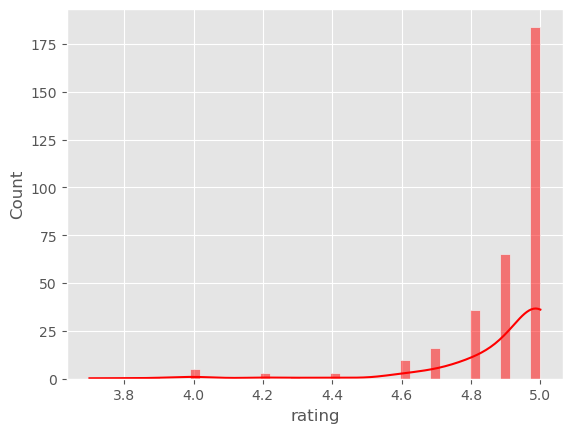

In [12]:
df=df[df["rating"]>=3.5]
sns.histplot(data=df.rating, color= "red", kde=True)

<Axes: xlabel='views', ylabel='Count'>

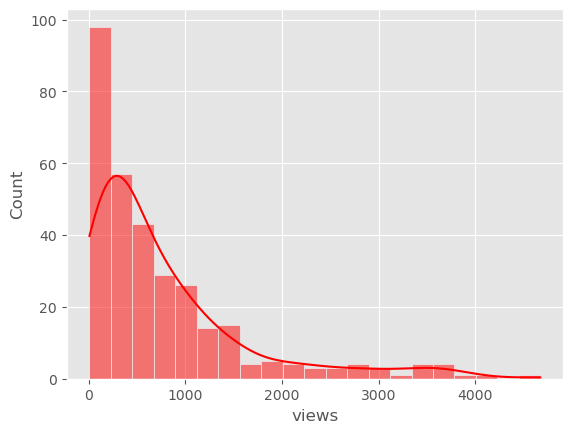

In [13]:
df=df[df["views"]<=5000]
sns.histplot(data=df.views, color= "red", kde=True)


<Axes: xlabel='otz', ylabel='Count'>

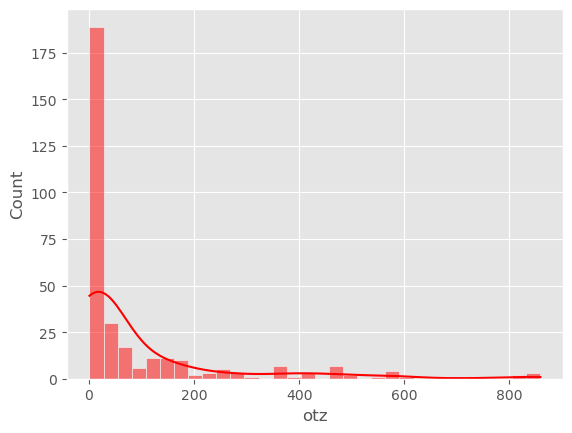

In [14]:
#df=df[df["views"]<=5000]
sns.histplot(data=df.otz, color= "red", kde=True)

<Axes: xlabel='price', ylabel='Count'>

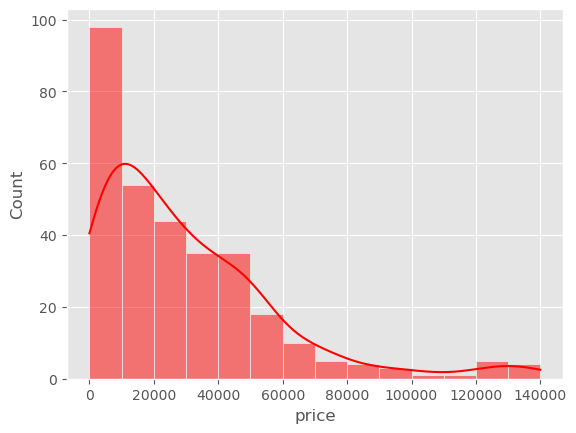

In [15]:
df=df[df["price"]<=150000]
sns.histplot(data=df.price, color= "red", kde=True)

In [16]:
df.isna().sum()

name      0
price     0
desc      0
rating    0
otz       0
views     0
dtype: int64

In [17]:
df.dtypes

name       object
price       int64
desc       object
rating    float64
otz         int64
views       int64
dtype: object

<Axes: >

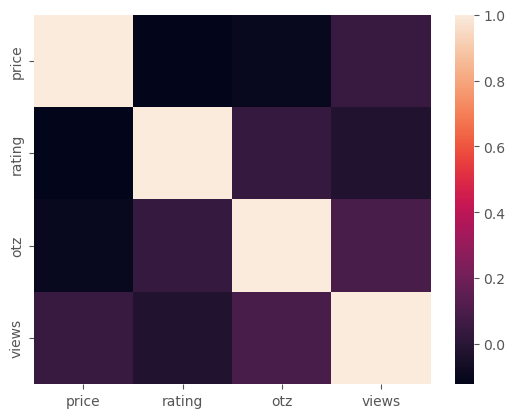

In [18]:
sns.heatmap(df.corr())

In [19]:
import sklearn 
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import r2_score


In [20]:
count_vectorizer = feature_extraction.text.CountVectorizer()

In [21]:
vectorizer=feature_extraction.text.TfidfVectorizer()

<Axes: >

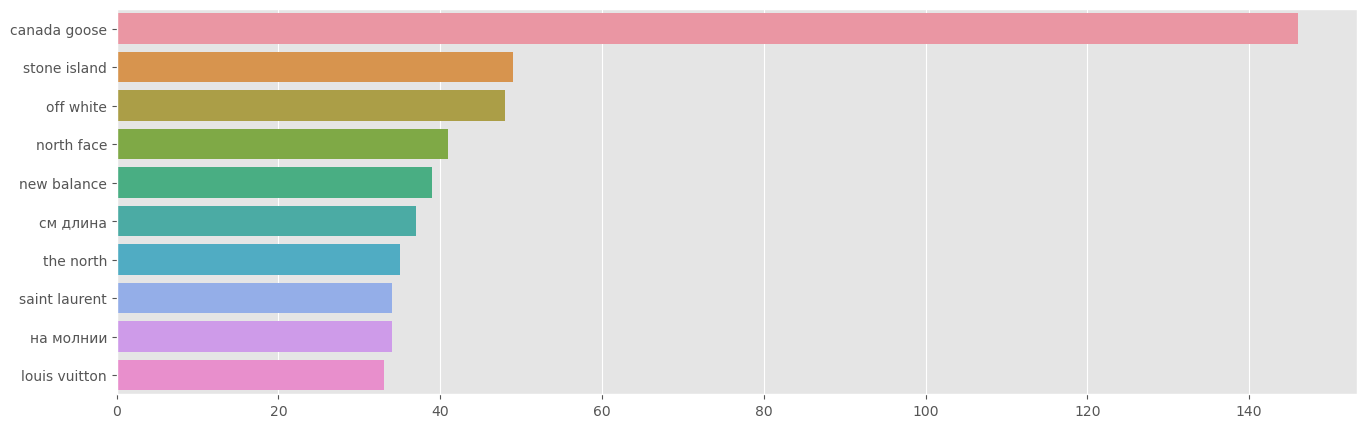

In [22]:
import matplotlib.pyplot as plt
def get_top_tweet_bigrams(corpus, n=None):
    vec = feature_extraction.text.CountVectorizer(ngram_range=(2, 2))
    vec.fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


plt.figure(figsize=(16,5))
top_tweet_bigrams=get_top_tweet_bigrams(df['desc'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

In [23]:

train_vectors = vectorizer.fit_transform(df["name"].tolist())
train_vectors2 = vectorizer.fit_transform(df["desc"].tolist())
data=df.copy()
df["name"]=train_vectors.todense()
df["desc"]=train_vectors.todense()

In [24]:
"""

train_vectors = count_vectorizer.fit_transform(df["name"])
train_vectors2 = count_vectorizer.fit_transform(df["desc"])
    
df["name"]=train_vectors.todense()"""


'\n\ntrain_vectors = count_vectorizer.fit_transform(df["name"])\ntrain_vectors2 = count_vectorizer.fit_transform(df["desc"])\n    \ndf["name"]=train_vectors.todense()'

<Axes: >

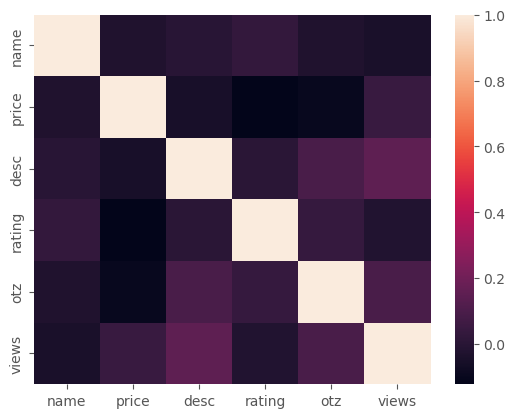

In [25]:
sns.heatmap(df.corr())

In [26]:
from catboost import CatBoostRegressor, cv, Pool
from sklearn.model_selection import train_test_split

In [27]:
model=CatBoostRegressor( random_seed=1, verbose=100)
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=["views"]), df["views"], test_size=0.2,random_state=42)

In [28]:
model.fit(X_train, y_train)
cb_preds = model.predict(X_test)

Learning rate set to 0.032951
0:	learn: 902.6806359	total: 56.7ms	remaining: 56.6s
100:	learn: 807.8063671	total: 93.7ms	remaining: 834ms
200:	learn: 745.4920684	total: 130ms	remaining: 517ms
300:	learn: 678.8593725	total: 173ms	remaining: 401ms
400:	learn: 613.6108433	total: 210ms	remaining: 313ms
500:	learn: 560.8780946	total: 247ms	remaining: 246ms
600:	learn: 519.7448098	total: 290ms	remaining: 193ms
700:	learn: 479.6352734	total: 333ms	remaining: 142ms
800:	learn: 442.3911948	total: 378ms	remaining: 93.9ms
900:	learn: 413.7766331	total: 424ms	remaining: 46.6ms
999:	learn: 384.6036579	total: 469ms	remaining: 0us


In [29]:
print(f"r2 = {r2_score(y_test,cb_preds)}")

r2 = -0.48492022639910193


In [30]:
!pip install hyperopt

In [31]:
data

,name,price,desc,rating,otz,views
0,Куртка Outventure,750,Наполнитель натуральный пух и перо\nНуждается ...,4.8,26,359
1,"Легкий нейлоновый пуховик Michael Kors, оригинал",5000,Женский легкий нейлоновый пуховик от американс...,5.0,169,185
2,Пуховик мужской Sivera Хорт 2.0,15000,Отличная теплая городская пуховая куртка для у...,5.0,36,1363
3,G Star Raw куртка бомбер теплый оригинал,4700,G Star Raw куртка мужская бомбер теплый оригин...,4.9,375,929
4,Чехол для хранения одежды fusalp,600,"Новый, выдавался при покупке куртки в фирменно...",4.9,64,92
...,...,...,...,...,...,...
350,"Пуховик parajumpers мужской оригинал L, XL",50000,Новый оригинальный пуховик от итальянского пре...,5.0,25,633
351,Парка пуховик черная P R A D A новая,12000,"Продам новую куртку парку пуховик Прада, в нал...",4.9,510,2963
352,Мужской пуховик Parajumpers,21000,Мужская куртка Parajumpers в отличном состояни...,5.0,38,185
353,Parajumpers Portland пуховик оригинал р M,21500,Зимняя куртка итальянского премиум бренда Para...,5.0,10,828
